In [1]:
import os
import numpy as np
import pandas as pd
import scipy.interpolate
import matplotlib.pyplot as plt
print(os.listdir())
path = os.getcwd()
figurepath = path + '/figures'

['.ipynb_checkpoints', '03242021_PIDTBT_PS_WP.txt', 'figures', 'IDTBT_PS_100.txt', 'IDTBT_PS_60.txt', 'IDTBT_PS_80.txt', 'UV-Vis analysis.ipynb']


In [2]:
'''
Use this if you need to read in data from the well-plate reader
'''
data=pd.read_csv("03242021_PIDTBT_PS_WP.txt", delimiter = "\t")

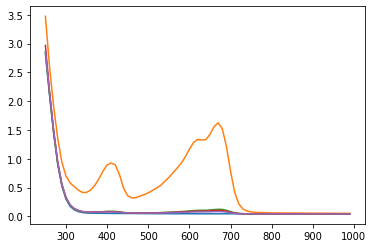

In [3]:
plt.figure()
xval = data["nm"]
for sample in data.columns.values:
    if sample != 'nm':
        yval = data[sample]
        plt.plot(xval,yval)

In [5]:
start = 300
stop = 800
init = data[data['nm'] == start].index.values
finit = data[data['nm'] == stop].index.values
data['100'][init[0]:finit[0]]

5     0.700
6     0.581
7     0.515
8     0.455
9     0.415
10    0.416
11    0.456
12    0.537
13    0.650
14    0.786
15    0.893
16    0.925
17    0.893
18    0.725
19    0.490
20    0.357
21    0.321
22    0.325
23    0.350
24    0.377
25    0.408
26    0.449
27    0.490
28    0.537
29    0.607
30    0.673
31    0.755
32    0.836
33    0.919
34    1.032
35    1.164
36    1.280
37    1.335
38    1.326
39    1.331
40    1.421
41    1.556
42    1.624
43    1.522
44    1.218
45    0.789
46    0.424
47    0.218
48    0.128
49    0.092
50    0.077
51    0.070
52    0.066
53    0.064
54    0.062
Name: 100, dtype: float64

In [32]:
data=pd.read_csv("03242021_PIDTBT_PS_WP.txt", delimiter = "\t")

# baseline subtraction
for sample in data.columns.values:
    if sample != 'nm' and sample != 'Baseline':
        data[sample] = data[sample] - data["Baseline"]
        
# data cutting
start = 300
stop = 800
init = data[data['nm'] == start].index.values
finit = data[data['nm'] == stop].index.values
data = data[init[0]:finit[0]]

#zero the baseline
for sample in data.columns.values:
    if sample != 'nm' and sample != 'Baseline':
        data[sample] = data[sample]-min(data[sample])

#normalizing
start = 550
stop = 600
init = data[data['nm'] == start].index.values
finit = data[data['nm'] == stop].index.values
print(data['nm'][init[0]:finit[0]])
top = max(data['100'][init[0]:finit[0]])
toploc = data[data['100'] == top].index.values
for sample in data.columns.values:
    if sample != 'nm' and sample != 'Baseline' and sample != '100':
        ratio = top/data[sample][toploc].iloc[0]
        data[sample] = data[sample]*ratio

35    600
36    610
37    620
38    630
39    640
Name: nm, dtype: int64
1.273


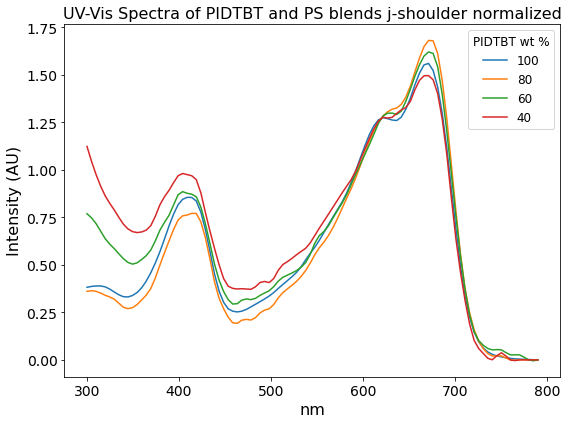

In [33]:
name_of_figure = 'UV-Vis Spectra of PIDTBT and PS blends j-shoulder normalized'
filename = figurepath + "/" + name_of_figure

plt.figure(figsize=(8,6))
xval = data["nm"]
for sample in data.columns.values:
    if sample != 'nm' and sample != "Baseline":
        yval = data[sample]
        f = scipy.interpolate.interp1d(xval, yval, kind = 'quadratic')
        xnew = np.linspace(min(xval), max(xval), num=100, endpoint=True)
        ynew = f(xnew)
        plt.plot(xnew,ynew, label = sample)

plt.xlabel('nm', fontsize=16)
plt.ylabel('Intensity (AU)', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12,loc='upper right',title='PIDTBT wt %' , title_fontsize=12)

plt.title(name_of_figure,fontsize=16)

#plt.ylim(0, 2.5)
#plt.xlim(-5, 55)

plt.tight_layout()
plt.savefig(filename, dpi=300, bbox_inches='tight')